# Support Vector Machines

## 1 Support Vector Machines

### 1.1 SVM with Linear Kernels


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
from nltk.stem import PorterStemmer
%matplotlib inline

In [37]:
from scipy.io import loadmat

data = loadmat('ex6data1.mat')

X = data['X']
y = data['y'].flatten()

In [3]:
print(X.shape)
print(y.shape)

(51, 2)
(51,)


In [4]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [5]:
def plotData(X, y):
    """plots the data points with + for the positive examples
%   and o for the negative examples. X is assumed to be a Mx2 matrix.
    Expects y is 1d array containing elements of either 1 or 0
    """
    fig, ax = plt.subplots(figsize=(7.5, 7.5))

    Xp = X[y==1, :]
    Xn = X[y==0, :]

    ax.plot(Xp[:, 0], Xp[:, 1], 'k+', markersize=8, label='Positive')
    ax.plot(Xn[:, 0], Xn[:, 1], 'yo', markersize=8, label='Negative')

    ax.legend()
    
    return fig, ax 

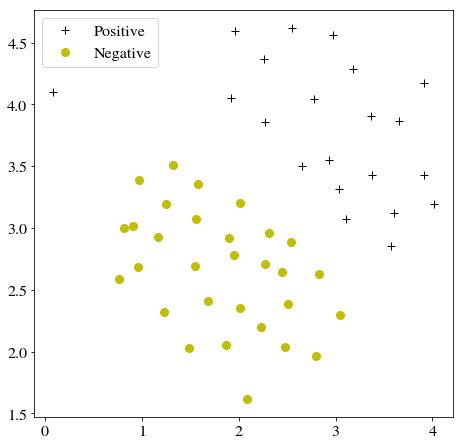

In [6]:
# plot
fig, ax = plotData(X, y)

In [39]:
# SVM to perform classification
from sklearn.svm import SVC

clf1 = SVC(C=1, kernel='linear', tol=0.001)
clf1.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Using regularization, C=1')

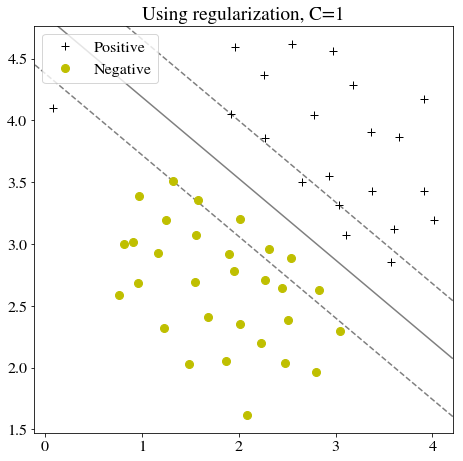

In [8]:
# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf1.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using regularization, C=1')

In [9]:
# SVM to perform classification
# this time with C=1000, almost no regularization
clf2 = SVC(C=1000, kernel='linear', tol=0.001)
clf2.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Using regularization, C=1000')

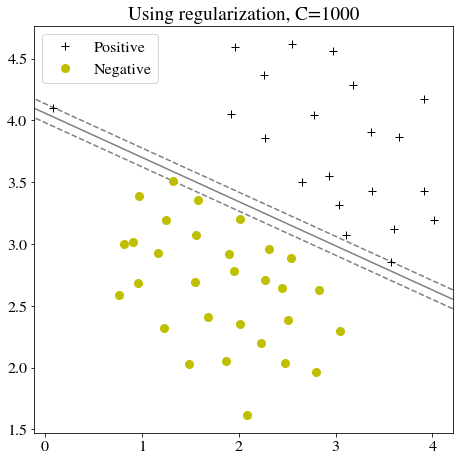

In [10]:
# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf2.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# comment
ax.set_title('Using regularization, C=1000')

### 1.2 SVM with Gaussian Kernels

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. Gaussian kernel is a similarity functioin that measures the distance between a pair of examples $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. 

The Gaussian kernel function is defined as:

$$K_{gaussian}(x^{(i)}, x^{(j)})=exp\left(-\frac{\|x^{(i)} - x^{(j)}\|^2}{2\sigma^2}\right)$$

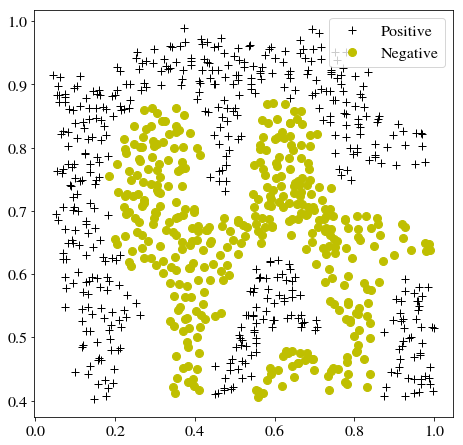

In [11]:
# Visualizing dataset 2

data = loadmat('ex6data2.mat')
X = data['X']
y = data['y'].ravel()

fig, ax = plotData(X, y)

In [12]:
def build_gaussianKernel(sigma):
    """
    svm.SVC requires custom kernel to have 2 arguments x1 and x2, 
    so use closure to include parameter sigma.
    """
    
    def gaussianKernel(x1, x2):
        """returns a gaussian kernel between x1 and x2
    %   and returns the value in sim (similarity)   
        """        
#         # debugging codes
#         print('Shape of x1 is {}'.format(x1.shape))
#         print('Shape of x2 is {}'.format(x2.shape))
        

        # number of samples (in training, this equals to training samples, in test, this equals to test samples)
        m = x1.shape[0]
        
        # number of features
        n = x2.shape[0]
        
        sim = np.zeros((m, n))
        for j in range(n):
            for i in range(m):
                sim[i, j] = np.exp(-(np.linalg.norm(x1[i, :]-x2[j, :]))**2 / (2*sigma**2))
                
        return sim
    
    return gaussianKernel

Text(0.5,1,'Using Gaussian Kernel')

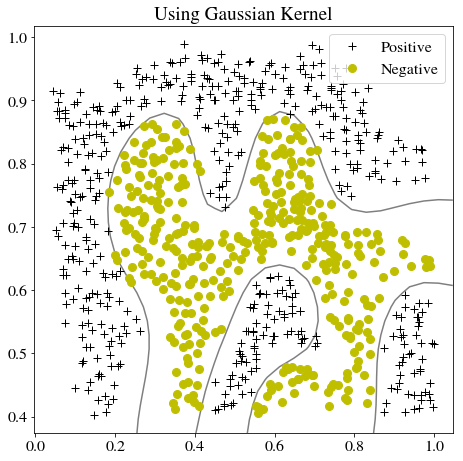

In [13]:
# perform classification
clf3 = SVC(C=1, kernel=build_gaussianKernel(sigma=0.1), tol=0.001)
clf3.fit(X, y)

# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf3.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles='-')

# comment
ax.set_title('Using Gaussian Kernel')

### 1.3 SVM with Gaussian Kernel 2


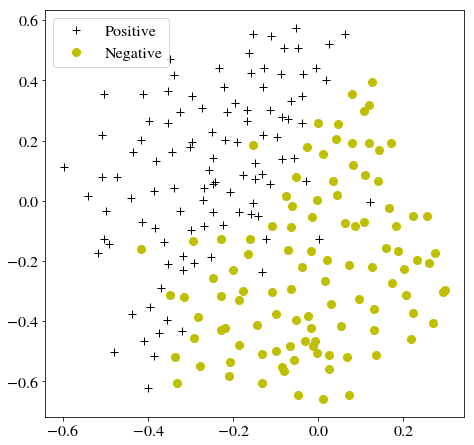

In [14]:
# Visualizing dataset 3
data = loadmat('ex6data3.mat')

X = data['X']
y = data['y'].ravel()
Xval = data['Xval']
yval = data['yval'].ravel()

# plot training samples
fig, ax = plotData(X, y)

In [28]:
def dataset3Params(X, y, Xval, yval):
    """returns best combination of C and sigma based on training error on a cross-validation set.
    """
    try_set = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    
    # init error
    min_error = 1
    
    for C in try_set:
        for sigma in try_set:
            
            # perform classification
            clf = SVC(C=C, kernel=build_gaussianKernel(sigma=sigma), tol=0.001)
            clf.fit(X, y)
            
            # apply model to cross val set
            ypred = clf.predict(Xval)
            
            # evaluate training error
            error = np.mean(ypred!=yval)
            
            # update optimal C and sigma
            if error < min_error:
                best_C = C
                best_sigma = sigma
                min_error = error
    
    return best_C, best_sigma
            

In [29]:
# get optimal training parameters
# this takes some time
C, sigma = dataset3Params(X, y, Xval, yval)

Text(0.5,1,'Using Gaussian Kernel')

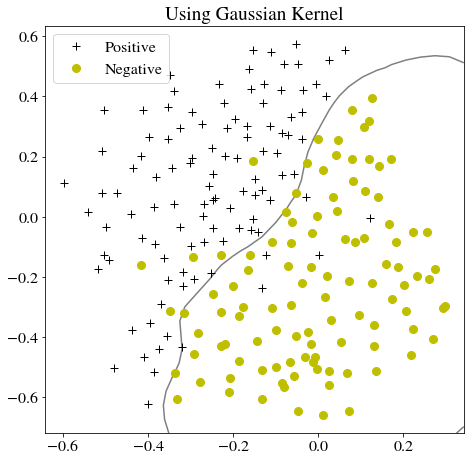

In [31]:
# perform classification
clf = SVC(C=C, kernel=build_gaussianKernel(sigma=sigma), tol=0.001)
clf.fit(X, y)

# visualize decision boundary
# plot training data
fig, ax = plotData(X, y)

# plot the decision function, aka hyperplane
# Reference: scikit-learn examples at:
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5, linestyles='-')

# comment
ax.set_title('Using Gaussian Kernel')
            

## 2 Spam Classification

### 2.1 Preprocessing Emails


In [24]:
def getVocabList():
    """reads the vocabulary list in vocab.txt 
%   and returns a dictionary of the words in vocabList. 
    """
    
    d = {}
    
    with open('vocab.txt', 'r') as f:
        for line in f:
            li = line.split()
            d[li[1]] = int(li[0])
            
    return d
            

In [28]:
def processEmail(email_contents):
    """preprocesses 
%   the body of an email and returns a list of indices of the 
%   words contained in the email. 
    """
    
    # init
    result = []
    vocabDict = getVocabList()
    
    # prepocessing
    # all lowercase
    email_contents = email_contents.lower()
    
    # strip HTML tags
    # starts with <, ends with >, has 0 or 1 /, no >, 1 or more chars
    p = re.compile(r'\<(/?[^\>]+)\>')
    email_contents = p.sub(' ', email_contents)
    
    # replace numbers with 'number'
    p = re.compile(r'[0-9]+')
    email_contents = p.sub('number', email_contents)
    
    # replace urls with 'httpaddr'
    p = re.compile(r'http(s?)://(\S*)')
    email_contents = p.sub('httpaddr', email_contents)
    
    # replace email address with 'emailaddr'
    p = re.compile(r'\S+@\S+')
    email_contents = p.sub('emailaddr', email_contents)
    
    # replace dollar sign $ with 'dollar'
    p = re.compile(r'\$+')
    email_contents = p.sub('dollar ', email_contents)
    
    # tokenize and get rid of any punctuation and non alphanumerics
    content_list = re.split(r'[^a-zA-Z0-9]+', email_contents)
    
    # word stemming
    stemmer = PorterStemmer()
    for word in content_list:
        word = stemmer.stem(word)
        if word in vocabDict:
            result.append(vocabDict[word])   
       
    return result

In [30]:
# test email preprocessing
with open('emailSample1.txt', 'r') as f:
    file_contents = f.read()
    
    word_indices = processEmail(file_contents)
    
print(word_indices)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 477, 1120, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


### 2.2 Extracting Features from Emails

In [34]:
def emailFeatures(word_indices):
    """takes in a word_indices vector and 
%   produces a feature vector from the word indices. 
    The feature vector has the same length as the volcabulary dict; and if one word appears in the email, 
    the corresponding vector element will be 1, otherwise 0.
    """
    
    # number of features, ie, number of words in vocabulary
    n = len(getVocabList())
    
    # init
    result = np.zeros(n)
    
    for i in word_indices:
        
        # map indexing starting from 1 to starting from 0
        result[i-1] = 1
        
    return result

In [35]:
# test feature extraction
features = emailFeatures(word_indices)

print(len(features))
print(sum(features > 0))

1899
45


### 2.3 Training SVM for Spam Classification


In [48]:
# load data
data2 = loadmat('spamTrain.mat')

X = data2['X']
y = data2['y'].ravel()

# debugging
# print('Shape of X is {}'.format(X.shape))

print('This may take a while to run!')

# SVM training
clf = SVC(C=1, kernel='linear', tol=0.001)
clf.fit(X, y)

# prediction on training sample
yp = clf.predict(X)

# training accuracy on training samples
acc = np.mean(yp==y)
print(acc)

Shape of X is (4000, 1899)
This may take a while to run!
0.99975


In [49]:
# Test training accuracy on test samples
data_test = loadmat('spamTest.mat')
Xtest = data_test['Xtest']
ytest = data_test['ytest'].ravel()

# prediction on test sample
yp_test = clf.predict(Xtest)

# training accuracy on training samples
acc = np.mean(yp_test==ytest)
print(acc)

This may take a while to run!
0.978


### 2.4 Top Predictors for Spam


In [58]:
# 
weight = clf.coef_.ravel()

idx = np.argsort(weight)[::-1][:15]
print(idx)
vocabDict = getVocabList()

for i in idx:
    for k, v in vocabDict.items():
        if v == i+1:
            print(k)

[1190  656 1847 1123 1397 1795  297  194  738 1476 1648  851  478 1697  155]
our
flash
wi
numberb
remov
visit
click
bodi
guarante
send
tel
instruct
dollarnumb
tm
basenumb
